## Observations and Insights 

Reviewing the data from this study shows tumor volumes within similar percentages of male versus female rats were studied: 51% male and 49% female. Two hundred and forty nine mice were studied; however, one moujse, g989 showed errors in data and was removed from the analysis, leaving 248 total participatants. Nine separate drug regimens and a placebo were given, and tumor volume, mouse weight, and metastatic sites were measured over time. The amount of timepoints measured for each drug were inconsistent between regimens, giving different amounts of data. 

Between the drug regimens, significant differences in average tumor size was shownin both Campomulin and Ramicane regimens. They also presented lower standards of deviation from the norm of the data.  Both regimens show promise that should be studied more thoroughly. 

Capomulin also showed a positive correlation between weight and tumor volume. Further analysis of the other regimens to compare correlation is suggested. 

In this analysis, the placebo is not given further in depth analysis. Recommendations include contrasting correlation between tumor volume and weight in the placebo with the other regimens studied to the impact of the varying regimens. Further study with more participants for each regimen and consistent timepoint data is also recommended. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress
import statsmodels.api as sm

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

df = pd.merge(study_results, mouse_metadata, how= "left", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
df.shape


(1893, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [6]:
len(df)

1893

In [7]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = df.groupby(["Mouse ID", "Timepoint"])
mouse_dup.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [9]:
dup_mouse = df.loc[df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mouse

array(['g989'], dtype=object)

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse1 = df.loc[df["Mouse ID"] == 'g989']
dup_mouse1


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.loc[df["Mouse ID"] != 'g989']
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [12]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

avgs = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
sdev= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sems= clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summ1 = pd.concat([avgs, med, variance, sdev, sems], axis=1)
summ1.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
summ1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
clean_df["Drug Regimen"].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [15]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_average = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ['mean', 'median', 'var', 'std', 'sem']})
tumor_average

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

time_mouse = clean_df.groupby("Drug Regimen").agg({"Timepoint": ['count']}).reset_index()
time_mouse.columns= ["Drug Regimen", "Total Timepoints"]
time_mouse

,Drug Regimen,Total Timepoints
0,Capomulin,230
1,Ceftamin,178
2,Infubinol,178
3,Ketapril,188
4,Naftisol,186
5,Placebo,181
6,Propriva,148
7,Ramicane,228
8,Stelasyn,181
9,Zoniferol,182


<AxesSubplot:title={'center':'Total Timeplots for Mice Tested by Drug Regimens'}, xlabel='Drug Regimen', ylabel='Total Timepoints'>

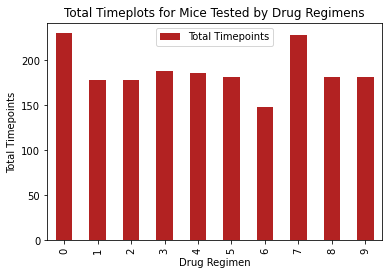

In [17]:
time_mouse.plot(kind= "bar", color='firebrick', title="Total Timeplots for Mice Tested by Drug Regimens", xlabel= "Drug Regimen", ylabel= "Total Timepoints" )


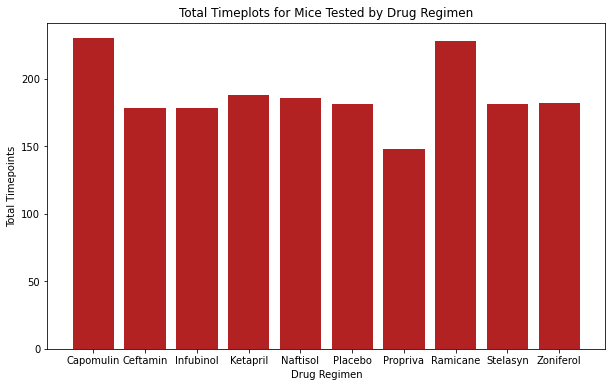

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(time_mouse["Drug Regimen"], time_mouse["Total Timepoints"], color= "firebrick")

plt.title("Total Timeplots for Mice Tested by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")

plt.show()


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
summ2 = clean_df["Sex"].value_counts().reset_index()
summ2.columns= ["Gender", "Count"]
summ2


,Gender,Count
0,Male,958
1,Female,922


<AxesSubplot:ylabel='Count'>

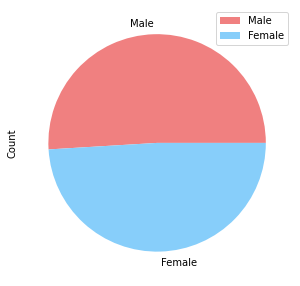

In [20]:

summ2.plot(kind= "pie", y= "Count", figsize=(10,5), labels= ["Male","Female"], colors= ["lightcoral", "lightskyblue"]) 


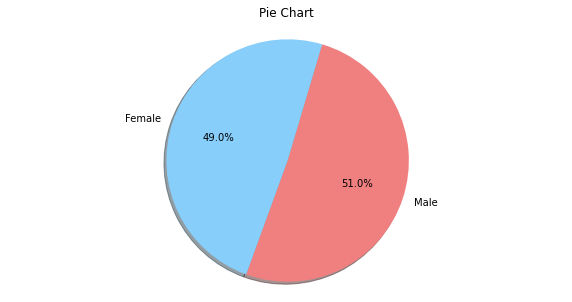

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure(figsize=(10,5))
labels = ["Male", "Female"]
colors = ["lightcoral", "lightskyblue"]
plt.pie(summ2["Count"], labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)
plt.axis("equal")
plt.title("Pie Chart")
plt.show()




## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_time = clean_df.groupby(["Mouse ID"]).max()["Timepoint"]
max_time
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_time = max_time.reset_index()
merge_df = max_time.merge(clean_df, on= ["Mouse ID", "Timepoint"], how= "left" )
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvd = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor = merge_df.loc[merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)" ]
    
    # add subset 
    tumorvd.append(final_tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]
    print(outliers)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


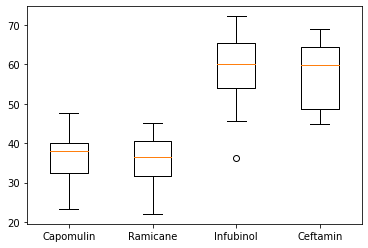

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumorvd, labels = drug_list)
#Add titles and labels
plt.show()

## Line and Scatter Plots

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin= clean_df["Drug Regimen"] == "Capomulin"
clean_df[capomulin].head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


<function matplotlib.pyplot.show(close=None, block=None)>

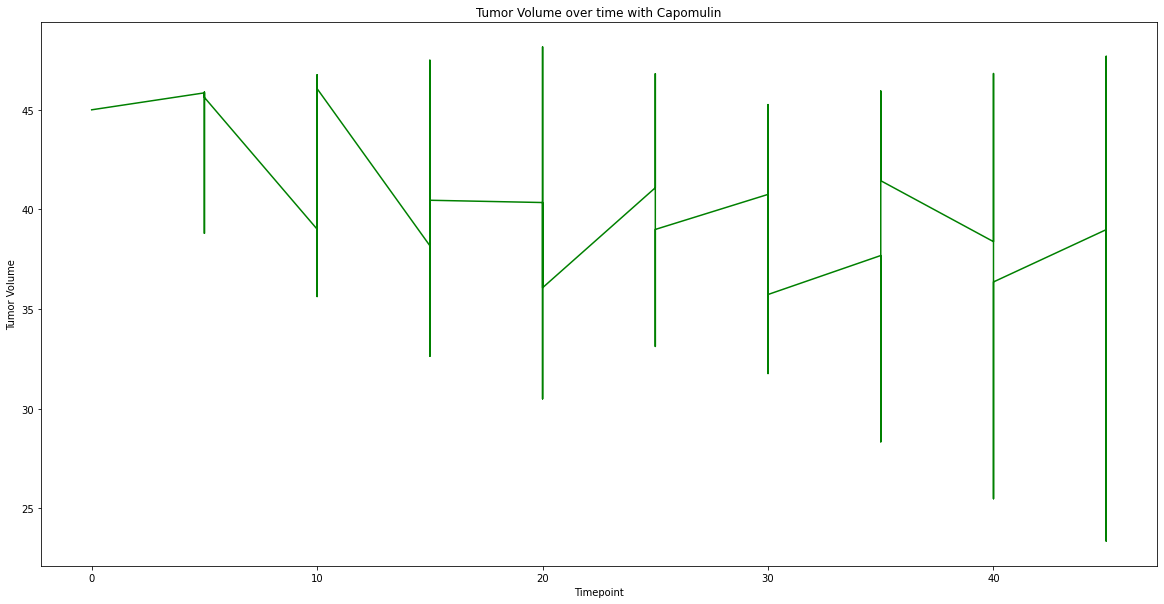

In [26]:

plt.figure(figsize=(20,10))
plt.plot(clean_df[capomulin]["Timepoint"], clean_df[capomulin]["Tumor Volume (mm3)"], color= "green")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume over time with Capomulin")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

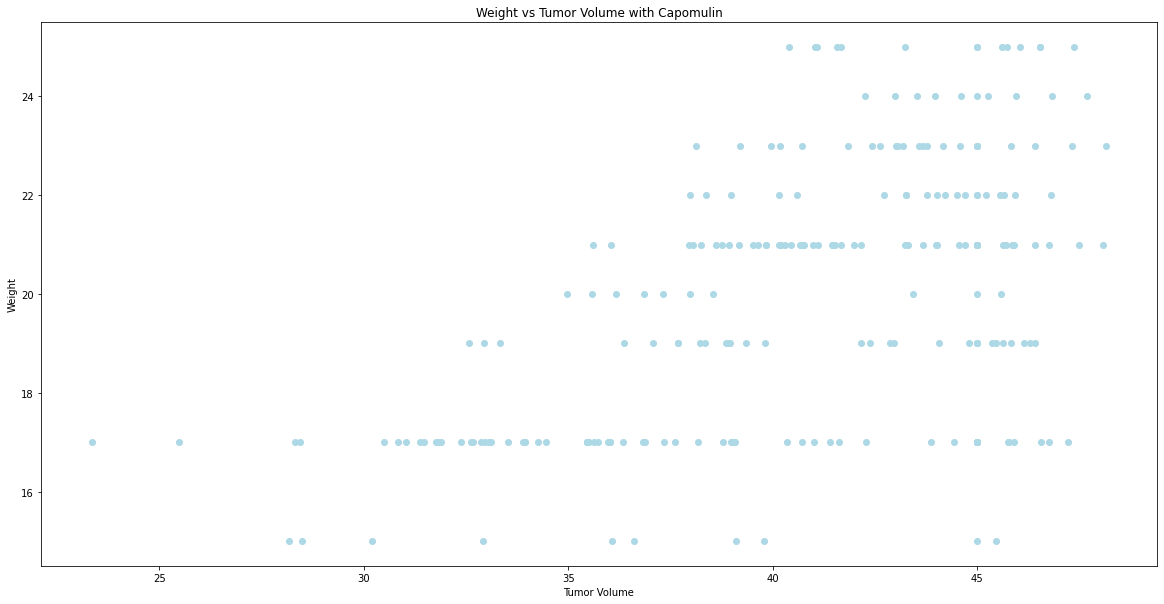

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = clean_df[capomulin]["Tumor Volume (mm3)"]
y_values = clean_df[capomulin]["Weight (g)"]
plt.figure(figsize=(20,10))
plt.scatter(x_values, y_values, color= "lightblue")
plt.xlabel("Tumor Volume")
plt.ylabel("Weight")
plt.title("Weight vs Tumor Volume with Capomulin")
plt.show

## Correlation and Regression

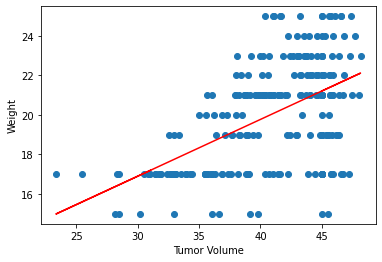

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = clean_df[capomulin]["Tumor Volume (mm3)"]
y_values = clean_df[capomulin]["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="green")
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
plt.show()